#                               **Game Success Prediction**


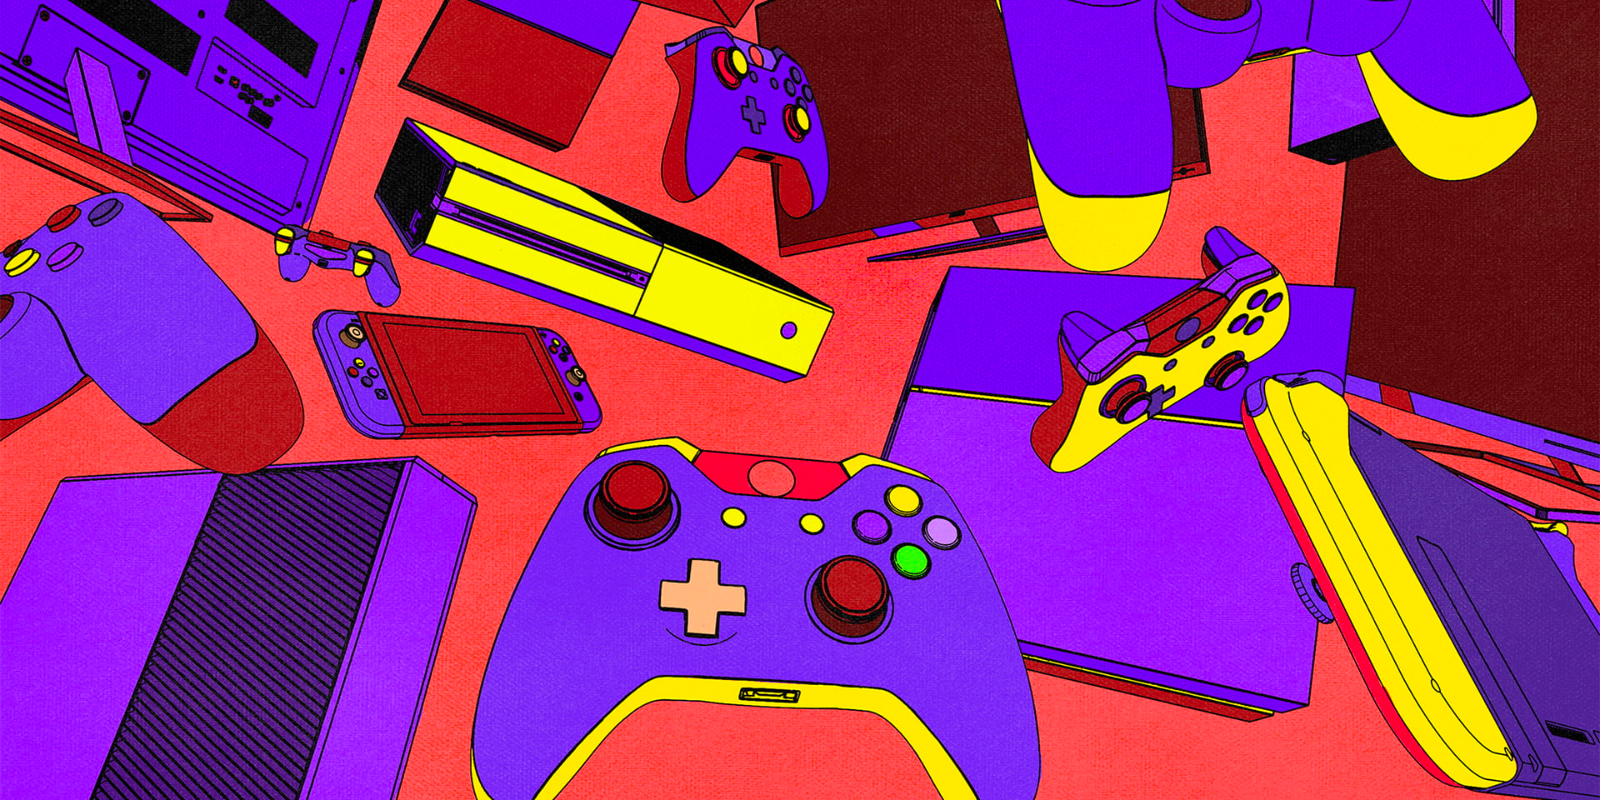

In [ ]:
#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import cufflinks as cf
import statistics
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
#Read dataset
df = pd.read_csv('games-regression-dataset.csv')

In [ ]:
df.shape  # 5214 Rows - 18 attributes

(5214, 18)

In [ ]:
df.head(5)

,URL,ID,Name,Subtitle,Icon URL,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Average User Rating
0,https://apps.apple.com/us/app/heir-of-light/id...,1264483706,HEIR OF LIGHT,Dark Fantasy RPG,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,982,0.00,"29.99, 19.99, 9.99, 29.99, 29.99, 8.99, 4.99, ...","A Dark Fantasy, Collectible RPG\n\nDarkness ha...",GAMEVIL Inc.,12+,"EN, FR, DE, JA, KO, ZH, ES, TH, ZH, VI",894489600,Games,"Games, Role Playing, Strategy",6/3/2018,31/07/2019,4.0
1,https://apps.apple.com/us/app/endgame-eurasia/...,607705356,Endgame:Eurasia,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,19,0.00,NaN,"""This interactive experience is an exploration...",Auroch Digital Ltd,12+,EN,116407296,Games,"Games, Simulation, Strategy, News",21/03/2013,28/06/2017,3.5
2,https://apps.apple.com/us/app/free-solitaire/i...,627491527,Free Solitaire+,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,14,0.00,NaN,Same Solitaire game with classic Solitaire run...,Chen Zhong Yuan,4+,"EN, ZH",50647040,Games,"Games, Strategy, Entertainment, Card",4/4/2013,21/04/2015,4.5
3,https://apps.apple.com/us/app/draft-trainer/id...,430252596,Draft Trainer,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,88,1.99,NaN,** Discounted for a limited time **\n\nEver wo...,"GG Wizards, LLC",9+,EN,28120064,Games,"Games, Utilities, Card, Strategy",26/05/2011,23/07/2019,3.5
4,https://apps.apple.com/us/app/rogue-knight-inf...,1115082819,Rogue Knight: Infested Lands,Tactical roguelike w/ stealth,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,13,3.99,NaN,Fight or sneak your way through hordes of mons...,Luis Regueira,12+,EN,39915520,Games,"Games, Role Playing, Strategy",19/05/2017,6/2/2019,4.5


#*Data Exploration & Visualization*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5214 entries, 0 to 5213
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           5214 non-null   object 
 1   ID                            5214 non-null   int64  
 2   Name                          5214 non-null   object 
 3   Subtitle                      1465 non-null   object 
 4   Icon URL                      5214 non-null   object 
 5   User Rating Count             5214 non-null   int64  
 6   Price                         5214 non-null   float64
 7   In-app Purchases              3175 non-null   object 
 8   Description                   5214 non-null   object 
 9   Developer                     5214 non-null   object 
 10  Age Rating                    5214 non-null   object 
 11  Languages                     5203 non-null   object 
 12  Size                          5214 non-null   int64  
 13  Pri

In [ ]:
df.nunique().sort_values(ascending=False)

URL                             5171
Name                            5171
Icon URL                        5171
ID                              5171
Description                     5099
Size                            5081
Developer                       3084
Original Release Date           2280
In-app Purchases                2052
Current Version Release Date    1976
User Rating Count               1410
Subtitle                        1399
Languages                        580
Genres                           507
Primary Genre                     19
Price                             17
Average User Rating                9
Age Rating                         4
dtype: int64

In [ ]:
df.isna().sum().sort_values(ascending=False)


Subtitle                        3749
In-app Purchases                2039
Languages                         11
URL                                0
Age Rating                         0
Current Version Release Date       0
Original Release Date              0
Genres                             0
Primary Genre                      0
Size                               0
Developer                          0
ID                                 0
Description                        0
Price                              0
User Rating Count                  0
Icon URL                           0
Name                               0
Average User Rating                0
dtype: int64

In [ ]:
#important Statistical values
columns_to_include = ["Price", "Size" , "Average User Rating"]
df_description = df[columns_to_include].describe()

print(df_description)

             Price          Size  Average User Rating
count  5214.000000  5.214000e+03          5214.000000
mean      0.602551  1.379577e+08             4.032988
std       2.551937  2.526826e+08             0.751854
min       0.000000  2.158400e+05             1.000000
25%       0.000000  2.751732e+07             3.500000
50%       0.000000  6.740582e+07             4.000000
75%       0.000000  1.592689e+08             4.500000
max     139.990000  4.005591e+09             5.000000


In [ ]:
unique_values = df['Age Rating'].unique()

# Print the unique values in Age Rating
print("unique values of Age Rating:  " ,unique_values)



unique values of Age Rating:   ['12+' '4+' '9+' '17+']


In [ ]:

unique_values = df['Primary Genre'].unique()

# Print the unique values in Age Rating
print("unique values of Primary Genere:  " ,unique_values)

unique values of Primary Genere:   ['Games' 'Sports' 'Entertainment' 'Utilities' 'Finance' 'Productivity'
 'Business' 'Music' 'Reference' 'Education' 'Medical' 'Food & Drink'
 'Stickers' 'Health & Fitness' 'Shopping' 'Book' 'News'
 'Social Networking' 'Lifestyle']


In [ ]:


# Extract the language column into a list
lang_list = df['Languages'].tolist()

# Split each language attribute into a list of individual languages
all_languages = []
for lang in lang_list:
    if isinstance(lang, str):
        languages = lang.split(',')
        all_languages.append(languages)

# Flatten the list of lists into a single list
flat_list = [lang.strip() for sublist in all_languages for lang in sublist]

# Get a unique set of languages
unique_languages = set(flat_list)

# Print the unique set of languages
print("Unique Languages: ",unique_languages)

Unique Languages:  {'UK', 'IU', 'TH', 'TK', 'PL', 'NB', 'SA', 'PA', 'GV', 'KO', 'RO', 'JA', 'HE', 'MK', 'LT', 'EL', 'CA', 'AY', 'DZ', 'MN', 'NL', 'GD', 'UG', 'KY', 'ID', 'KN', 'SI', 'NE', 'SD', 'LO', 'HR', 'SQ', 'FR', 'DA', 'AF', 'GN', 'FA', 'MR', 'EU', 'NN', 'GU', 'OM', 'SU', 'EN', 'KK', 'SL', 'MT', 'TR', 'RW', 'KS', 'TO', 'ZU', 'SO', 'HI', 'UR', 'KL', 'PT', 'OR', 'ET', 'TE', 'RN', 'PS', 'TT', 'BS', 'BO', 'MS', 'HY', 'RU', 'AS', 'KR', 'SK', 'NO', 'TA', 'JV', 'BN', 'AZ', 'SW', 'FI', 'HU', 'AR', 'ES', 'TI', 'KU', 'GA', 'BR', 'QU', 'KA', 'MY', 'TL', 'EO', 'ZH', 'CS', 'BE', 'SE', 'CY', 'SV', 'VI', 'BG', 'KM', 'ML', 'LA', 'GL', 'LV', 'YI', 'TG', 'IT', 'UZ', 'SR', 'AM', 'MG', 'IS', 'DE', 'FO'}


In [ ]:
unique_values = pd.Series(df['Average User Rating'].unique()).sort_values()

# Print the unique values in User Ratings
print("unique values of User Ratings: \n", unique_values)


unique values of User Ratings: 
 8    1.0
7    1.5
6    2.0
3    2.5
5    3.0
1    3.5
0    4.0
2    4.5
4    5.0
dtype: float64


In [ ]:
# more than 75% of the games are free to play
df_price = df.loc[df['Price'].notnull()].reset_index() # creating a copy data set & adding new attribute "paid | free"
df_price['paid | free']=0

for i in range(len(df_price['Price'])):
    if df_price['Price'][i] > 0:
        df_price['paid | free'][i] = 'pay-to-play'
    else:
        df_price['paid | free'][i] = 'free-to-play'

df_price_pie = pd.DataFrame(df_price['paid | free'].value_counts()).reset_index()
df_price_pie.columns = ['paid | free', 'count']

In [ ]:
df_price.head() #check the price & paid | free attributes

,index,URL,ID,Name,Subtitle,Icon URL,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Average User Rating,paid | free
0,0,https://apps.apple.com/us/app/heir-of-light/id...,1264483706,HEIR OF LIGHT,Dark Fantasy RPG,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,982,0.00,"29.99, 19.99, 9.99, 29.99, 29.99, 8.99, 4.99, ...","A Dark Fantasy, Collectible RPG\n\nDarkness ha...",GAMEVIL Inc.,12+,"EN, FR, DE, JA, KO, ZH, ES, TH, ZH, VI",894489600,Games,"Games, Role Playing, Strategy",6/3/2018,31/07/2019,4.0,free-to-play
1,1,https://apps.apple.com/us/app/endgame-eurasia/...,607705356,Endgame:Eurasia,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,19,0.00,NaN,"""This interactive experience is an exploration...",Auroch Digital Ltd,12+,EN,116407296,Games,"Games, Simulation, Strategy, News",21/03/2013,28/06/2017,3.5,free-to-play
2,2,https://apps.apple.com/us/app/free-solitaire/i...,627491527,Free Solitaire+,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,14,0.00,NaN,Same Solitaire game with classic Solitaire run...,Chen Zhong Yuan,4+,"EN, ZH",50647040,Games,"Games, Strategy, Entertainment, Card",4/4/2013,21/04/2015,4.5,free-to-play
3,3,https://apps.apple.com/us/app/draft-trainer/id...,430252596,Draft Trainer,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,88,1.99,NaN,** Discounted for a limited time **\n\nEver wo...,"GG Wizards, LLC",9+,EN,28120064,Games,"Games, Utilities, Card, Strategy",26/05/2011,23/07/2019,3.5,pay-to-play
4,4,https://apps.apple.com/us/app/rogue-knight-inf...,1115082819,Rogue Knight: Infested Lands,Tactical roguelike w/ stealth,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,13,3.99,NaN,Fight or sneak your way through hordes of mons...,Luis Regueira,12+,EN,39915520,Games,"Games, Role Playing, Strategy",19/05/2017,6/2/2019,4.5,pay-to-play


In [ ]:


fig = px.bar(df, x=df['Price'].value_counts().index, y=df['Price'].value_counts().values,
             template='ggplot2', title='Representation of prices')

fig.update_yaxes(
                 title_text='Count')

fig.update_xaxes(type='category', categoryorder='category ascending', showgrid=False,
                 title_text='Price Ranges')

fig.update_traces(outsidetextfont={'color': 'white', 'size': 12}, marker_color='#1D2951')



In [ ]:


# using plotly express library
fig = px.pie(df_price_pie, values = 'count', names = 'paid | free', title = 'Free-to-play vs Pay-to-play',
            template = 'ggplot2', hole = 0.4)
fig.update_traces(textinfo = 'percent+label', rotation = 60,
                  marker = dict(line = dict(color = 'Blue', width = 0.5)), textposition='inside',
                  insidetextorientation='tangential', opacity = 0.7,
                  insidetextfont = {'color' : 'Black', 'size' : 16})

In [ ]:
#Prepare data frame for plotting distribution of Age Rating variable
df_age = df.loc[df['Age Rating'].notnull()].reset_index()
df_age_pie = pd.DataFrame(df_price['Age Rating'].value_counts()).reset_index()
df_age_pie.columns = ['Age Rating', 'count']

In [ ]:
# Create a pie chart
fig = px.pie(df_age_pie, values = 'count', names = 'Age Rating', title = 'Age Rating',
            template = 'ggplot2', hole = 0.4)
fig.update_traces(textinfo = 'percent+label', rotation = 110,
                  marker = dict(line = dict(color = 'black', width = 3)),
                  insidetextorientation='tangential', opacity = 0.7,
                  outsidetextfont = {'color' : 'black', 'size' : 14}, textposition = 'outside')

In [ ]:

df_rating =  df['Average User Rating'].value_counts().reset_index() # create an image of the data set for avg rates
df_rating. columns = ['Average User Rating', 'Count']  # columns will be avg rate & count of users for each rate
df_rating['prct'] = df_rating['Count'] / sum(df_rating['Count'])*100  # new column to represent the percentage of occurence of each rate within the data set
#Convert Average User Rating into categorical type
df_rating.loc[:, 'Average User Rating'] = df_rating['Average User Rating']
rating = ['1.0', '1.5', '2.0', '2.5', '3.0', '3.5', '4.0', '4.5', '5.0']
c_rating = pd.api.types.CategoricalDtype(ordered = True, categories = rating)
df_rating.loc[:, 'Average User Rating'] = df_rating['Average User Rating']

In [ ]:
#Create a barplot
fig = px.bar(df_rating, x = 'Average User Rating', y = 'Count', template = 'ggplot2',
                   title = 'Distribution of Average User Rating', text = 'prct')
fig.update_xaxes(type='category', categoryorder='category ascending', showgrid = False)
fig.update_traces(texttemplate='%{text:.2s}%', textposition='inside',
                  outsidetextfont = {'color' : 'white', 'size' : 12}, marker_color = '#1D2951')

In [ ]:
#Gather all genres into one string
genres = df['Genres'].str.cat(sep = ', ')
#Split the genres and put in into pandas series
data = pd.Series(genres.split(', '))
#Count unique values and put it into dataframe
genres = pd.DataFrame(data.value_counts())
genres = genres.reset_index()
#Change column names
genres.columns = ['Genre', 'Count']
#Drop general genres and sort the dataframe in ascending order
genres = genres.sort_values('Count',ascending=True)

In [ ]:
#Plot the distribution
fig = px.bar(genres.tail(20), y = 'Count', x = 'Genre', text = 'Count', template = 'ggplot2', title = 'Distribution of Genres')
fig.update_yaxes(showgrid=False)
fig.update_layout(uniformtext_minsize = 8)
fig.update_traces(textposition = 'inside', opacity = 1, marker_color = '#1D2951')

In [ ]:
# Define a function to count the number of languages in each record
def count_languages(row):
    # Convert the Languages column to a string and split by commas
    languages = str(row['Languages']).split(',')
    # Count the number of languages and return the result
    return len(languages)

# Apply the function to each row and create a new column called num_lang
df['num_lang'] = df.apply(count_languages, axis=1)


<ipython-input-23-8a5b1d16f344>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



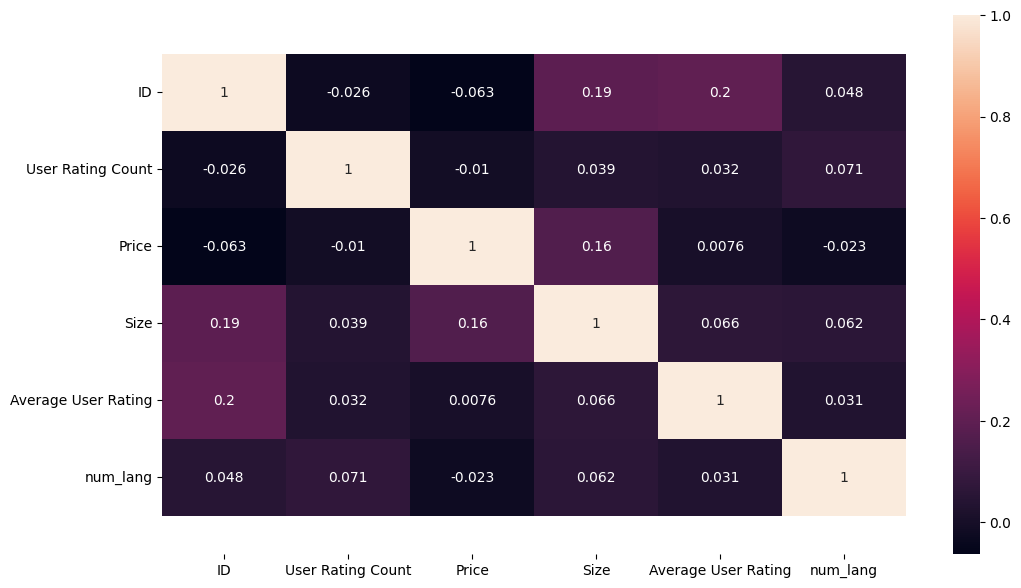

In [ ]:
f,ax= plt.subplots(figsize=(12,7))
g = sns.heatmap(df.corr(),annot= True)
bottom, top = g.get_ylim()
g.set_ylim(bottom+.5, top-.5)
plt.show()

In [ ]:
df.head(5)

,URL,ID,Name,Subtitle,Icon URL,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Average User Rating,num_lang
0,https://apps.apple.com/us/app/heir-of-light/id...,1264483706,HEIR OF LIGHT,Dark Fantasy RPG,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,982,0.00,"29.99, 19.99, 9.99, 29.99, 29.99, 8.99, 4.99, ...","A Dark Fantasy, Collectible RPG\n\nDarkness ha...",GAMEVIL Inc.,12+,"EN, FR, DE, JA, KO, ZH, ES, TH, ZH, VI",894489600,Games,"Games, Role Playing, Strategy",6/3/2018,31/07/2019,4.0,10
1,https://apps.apple.com/us/app/endgame-eurasia/...,607705356,Endgame:Eurasia,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,19,0.00,NaN,"""This interactive experience is an exploration...",Auroch Digital Ltd,12+,EN,116407296,Games,"Games, Simulation, Strategy, News",21/03/2013,28/06/2017,3.5,1
2,https://apps.apple.com/us/app/free-solitaire/i...,627491527,Free Solitaire+,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,14,0.00,NaN,Same Solitaire game with classic Solitaire run...,Chen Zhong Yuan,4+,"EN, ZH",50647040,Games,"Games, Strategy, Entertainment, Card",4/4/2013,21/04/2015,4.5,2
3,https://apps.apple.com/us/app/draft-trainer/id...,430252596,Draft Trainer,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,88,1.99,NaN,** Discounted for a limited time **\n\nEver wo...,"GG Wizards, LLC",9+,EN,28120064,Games,"Games, Utilities, Card, Strategy",26/05/2011,23/07/2019,3.5,1
4,https://apps.apple.com/us/app/rogue-knight-inf...,1115082819,Rogue Knight: Infested Lands,Tactical roguelike w/ stealth,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,13,3.99,NaN,Fight or sneak your way through hordes of mons...,Luis Regueira,12+,EN,39915520,Games,"Games, Role Playing, Strategy",19/05/2017,6/2/2019,4.5,1


#Data Preprocessing

In [ ]:
# Make a copy of the dataset
df_final = df.copy()

# Split the languages into separate tokens
df_final['Languages'] = df_final['Languages'].str.split(',')

# Create one-hot encoded columns for each language
df_languages = pd.get_dummies(df_final['Languages'].apply(pd.Series).stack()).sum(level=0)

# Set all language values to either 0 or 1
df_languages[df_languages > 1] = 1





<ipython-input-25-3021178b6c3b>:8: FutureWarning:

Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().



In [ ]:
# Get the top 10 most used languages
top_languages = df_languages.sum().sort_values(ascending=False)[:4].index.tolist()

# Drop all languages that are not in the top 10
df_languages = df_languages[top_languages]

# Merge the one-hot encoded language columns back into the original dataset
df_final = pd.concat([df_final, df_languages], axis=1)

# Drop the original "Languages" column
df_final = df_final.drop('Languages', axis=1)

# Remove duplicates so that each record only contains a single instance of each language
df_final = df_final.groupby(df_final.columns, axis=1).max()


In [ ]:
# Make a copy of the dataset
df_finall = df_final.copy()

# Split the languages into separate tokens
df_finall['Genres'] = df_finall['Genres'].str.split(',')

# Create one-hot encoded columns for each language
df_genres = pd.get_dummies(df_finall['Genres'].apply(pd.Series).stack()).sum(level=0)

# Set all language values to either 0 or 1
df_genres[df_genres > 1] = 1

# Get the top 10 most used languages
top_genres = df_genres.sum().sort_values(ascending=False)[:4].index.tolist()




<ipython-input-27-38b91f0671ca>:8: FutureWarning:

Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().



In [ ]:
# Drop all languages that are not in the top 10
df_genres = df_genres[top_genres]

# Merge the one-hot encoded language columns back into the original dataset
df_finall = pd.concat([df_finall, df_genres], axis=1)



In [ ]:
# Drop the original "Languages" column
df_finall = df_finall.drop(['Genres','Primary Genre'] ,axis=1)



In [ ]:
# Remove duplicates so that each record only contains a single instance of each language
df_finall = df_finall.groupby(df_finall.columns, axis=1).max()

In [ ]:
#dealling with developers


# Get the top 5 appearing developers
top_developers = df_finall['Developer'].value_counts().head(5).index.tolist()

# Create a new column for each of the top 5 developers
for developer in top_developers:
    df_finall[developer] = (df_finall['Developer'] == developer).astype(int)

# Drop the original Developers column
df_finall.drop('Developer', axis=1, inplace=True)




In [ ]:
df_finall.head()

,DE,ES,Entertainment,FR,Puzzle,Strategy,Age Rating,Average User Rating,Current Version Release Date,Description,...,Size,Subtitle,URL,User Rating Count,num_lang,Tapps Tecnologia da Informa\xe7\xe3o Ltda.,Detention Apps,HexWar Games Ltd,EASY Inc.,Qumaron
0,1.0,1.0,0,1.0,0,1,12+,4.0,31/07/2019,"A Dark Fantasy, Collectible RPG\n\nDarkness ha...",...,894489600,Dark Fantasy RPG,https://apps.apple.com/us/app/heir-of-light/id...,982,10,0,0,0,0,0
1,0.0,0.0,0,0.0,0,1,12+,3.5,28/06/2017,"""This interactive experience is an exploration...",...,116407296,NaN,https://apps.apple.com/us/app/endgame-eurasia/...,19,1,0,0,0,0,0
2,0.0,0.0,1,0.0,0,1,4+,4.5,21/04/2015,Same Solitaire game with classic Solitaire run...,...,50647040,NaN,https://apps.apple.com/us/app/free-solitaire/i...,14,2,0,0,0,0,0
3,0.0,0.0,0,0.0,0,1,9+,3.5,23/07/2019,** Discounted for a limited time **\n\nEver wo...,...,28120064,NaN,https://apps.apple.com/us/app/draft-trainer/id...,88,1,0,0,0,0,0
4,0.0,0.0,0,0.0,0,1,12+,4.5,6/2/2019,Fight or sneak your way through hordes of mons...,...,39915520,Tactical roguelike w/ stealth,https://apps.apple.com/us/app/rogue-knight-inf...,13,1,0,0,0,0,0


In [ ]:
df_finall = df_finall.drop([' Strategy','ID', 'Name', 'Subtitle', 'Icon URL','Description'], axis=1)




In [ ]:
# convert start_date and end_date columns to datetime data type
df_finall['Current Version Release Date'] = pd.to_datetime(df_finall['Current Version Release Date'])
df_finall['Original Release Date'] = pd.to_datetime(df_finall['Original Release Date'])

# calculate the difference between end_date and start_date and assign it to a new column
df_finall['duration_days'] =   (df_finall['Current Version Release Date']-df_finall['Original Release Date']).dt.days

df_finall = df_finall.drop(['Original Release Date', 'Current Version Release Date'], axis=1)

df_finall.dropna(subset=['Average User Rating'], inplace=True) # Drop rows with missing values in Average User Rating
df_finall['Price'].fillna(0, inplace=True) # Replace missing values in Price with 0
#df_finall['InAppPurchases'].fillna('0', inplace=True) # Replace missing values in InAppPurchases with '0'
df_finall['User Rating Count'].fillna(0, inplace=True) # Replace missing values in User Rating Count with 0
df_finall['Age Rating'] = df_finall['Age Rating'].map({'4+': 0, '9+': 1, '12+': 2, '17+': 3}) # Convert AgeRating to numeric values
df_finall['Size'] = df_finall['Size'].astype(float) # Convert Size to float data type




<ipython-input-34-15859142690b>:2: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.

<ipython-input-34-15859142690b>:3: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [ ]:
df_finall['duration_days'] = df_finall['duration_days'].abs()

In [ ]:


def compute_avg_in_app_purchase(x):
  if x==0:
   return float(x)
  else:
    arr = str(x).split(',')
    arr = list(map(float, arr))
    return statistics.mean(arr)





df_finall['In-app Purchases'].fillna('0', inplace=True)
df_finall['In-app Purchases'] = df_finall['In-app Purchases'].apply(compute_avg_in_app_purchase)
df_finall.head(20)

,DE,ES,Entertainment,FR,Puzzle,Age Rating,Average User Rating,EN,Games,In-app Purchases,...,Size,URL,User Rating Count,num_lang,Tapps Tecnologia da Informa\xe7\xe3o Ltda.,Detention Apps,HexWar Games Ltd,EASY Inc.,Qumaron,duration_days
0,1.0,1.0,0,1.0,0,2,4.0,1.0,1,19.240000,...,894489600.0,https://apps.apple.com/us/app/heir-of-light/id...,982,10,0,0,0,0,0,423
1,0.0,0.0,0,0.0,0,2,3.5,1.0,1,0.000000,...,116407296.0,https://apps.apple.com/us/app/endgame-eurasia/...,19,1,0,0,0,0,0,1560
2,0.0,0.0,1,0.0,0,0,4.5,1.0,1,0.000000,...,50647040.0,https://apps.apple.com/us/app/free-solitaire/i...,14,2,0,0,0,0,0,747
3,0.0,0.0,0,0.0,0,1,3.5,1.0,1,0.000000,...,28120064.0,https://apps.apple.com/us/app/draft-trainer/id...,88,1,0,0,0,0,0,2980
4,0.0,0.0,0,0.0,0,2,4.5,1.0,1,0.000000,...,39915520.0,https://apps.apple.com/us/app/rogue-knight-inf...,13,1,0,0,0,0,0,744
5,1.0,1.0,0,1.0,0,1,4.5,1.0,1,7.990000,...,254496768.0,https://apps.apple.com/us/app/stellar-wars/id5...,1121,6,0,0,0,0,0,139
6,0.0,0.0,1,0.0,0,1,4.0,1.0,1,1.990000,...,19337216.0,https://apps.apple.com/us/app/cutie-no-cake-ho...,47,1,0,0,0,0,0,0
7,0.0,0.0,0,0.0,0,2,4.0,1.0,1,0.000000,...,230445056.0,https://apps.apple.com/us/app/vietnam-65/id948...,56,1,0,0,0,0,0,117
8,0.0,0.0,1,0.0,0,1,4.0,1.0,1,8.190000,...,63327232.0,https://apps.apple.com/us/app/airport-madness-...,1815,1,0,0,0,0,0,2748
9,0.0,0.0,1,0.0,0,0,4.0,1.0,1,0.000000,...,10452992.0,https://apps.apple.com/us/app/dac-jump-pixel-a...,37,2,0,0,0,0,0,0


In [ ]:
df_finall=df_finall.drop(['URL'],axis=1)

In [ ]:
# # # # Feature selection
y = df['Average User Rating']
X = df_finall.drop('Average User Rating',axis= 1)





In [ ]:
df_finall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5214 entries, 0 to 5213
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0    DE                                         5203 non-null   float64
 1    ES                                         5203 non-null   float64
 2    Entertainment                              5214 non-null   int64  
 3    FR                                         5203 non-null   float64
 4    Puzzle                                     5214 non-null   int64  
 5   Age Rating                                  5214 non-null   int64  
 6   Average User Rating                         5214 non-null   float64
 7   EN                                          5203 non-null   float64
 8   Games                                       5214 non-null   int64  
 9   In-app Purchases                            5214 non-null   float64
 10  Price       

In [ ]:
df_finall[' DE'].fillna(0, inplace=True) # Replace missing values in User Rating Count with
df_finall[' FR'].fillna(0, inplace=True) # Replace missing values in User Rating Count with 0
df_finall[' ES'].fillna(0, inplace=True) # Replace missing values in User Rating Count with 0
#df_finall[' IT'].fillna(0, inplace=True) # Replace missing values in User Rating Count with 0
#df_finall[' JA'].fillna(0, inplace=True) # Replace missing values in User Rating Count with 0
#df_finall[' KO'].fillna(0, inplace=True) # Replace missing values in User Rating Count with 0
#df_finall[' PT'].fillna(0, inplace=True) # Replace missing values in User Rating Count with 0
#df_finall[' RU'].fillna(0, inplace=True) # Replace missing values in User Rating Count with 0
#df_finall['EN'].fillna(0, inplace=True) # Replace missing values in User Rating Count with 0
#df_finall[' ZH'].fillna(0, inplace=True) # Replace missing values in User Rating Count with 0
df_finall.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5214 entries, 0 to 5213
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0    DE                                         5214 non-null   float64
 1    ES                                         5214 non-null   float64
 2    Entertainment                              5214 non-null   int64  
 3    FR                                         5214 non-null   float64
 4    Puzzle                                     5214 non-null   int64  
 5   Age Rating                                  5214 non-null   int64  
 6   Average User Rating                         5214 non-null   float64
 7   EN                                          5203 non-null   float64
 8   Games                                       5214 non-null   int64  
 9   In-app Purchases                            5214 non-null   float64
 10  Price       

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer

# Impute missing values with the mean of the column
imputer = SimpleImputer(strategy='constant', fill_value=0)
X_imputed = imputer.fit_transform(X)

# Select top 10 features using f_regression
selector = SelectKBest(score_func=f_regression, k=13)
selector.fit(X_imputed, y)
X_new = selector.transform(X_imputed)
selected_features = X.columns[selector.get_support()].tolist()
print('Selected features:', selected_features)


Selected features: [' DE', ' ES', ' FR', ' Puzzle', 'Games', 'In-app Purchases', 'Size', 'User Rating Count', 'num_lang', 'Tapps Tecnologia da Informa\\xe7\\xe3o Ltda.', 'Detention Apps', 'HexWar Games Ltd', 'Qumaron']


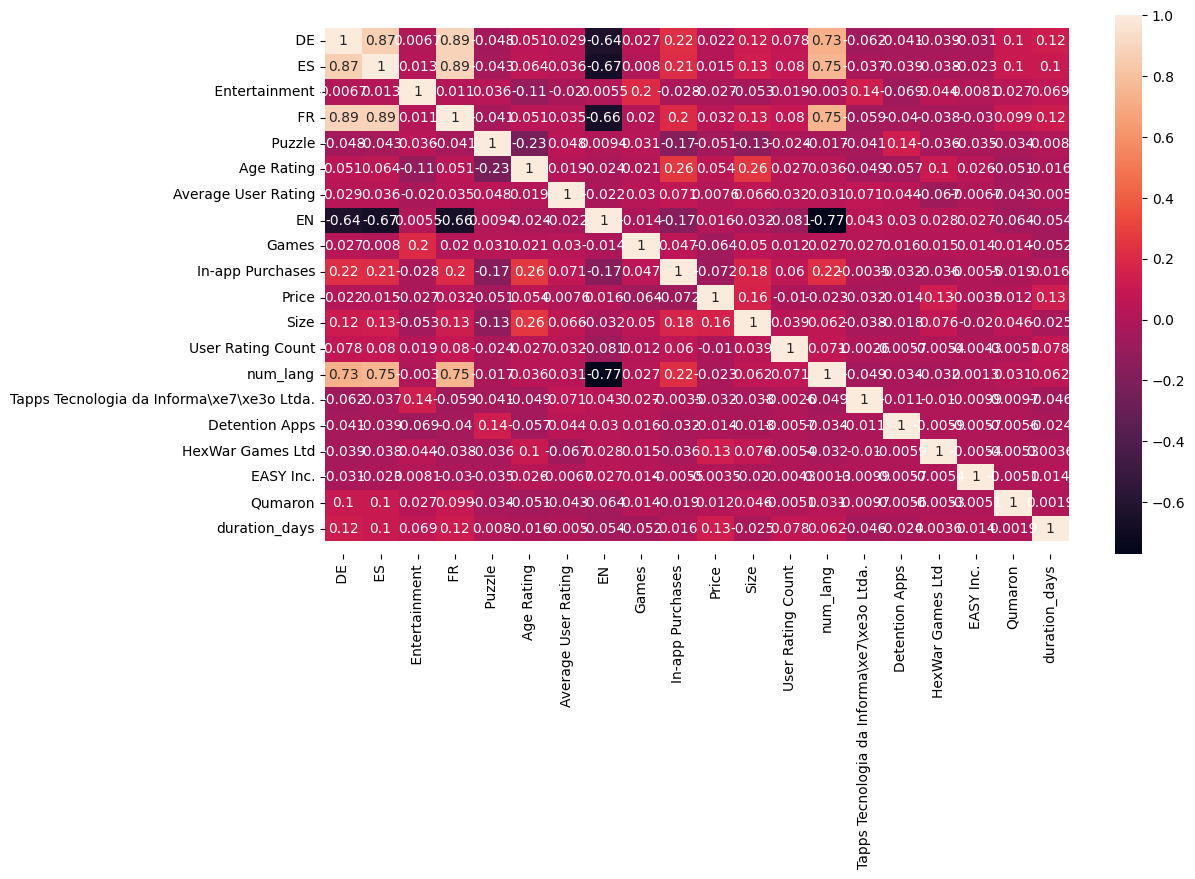

In [ ]:
f,ax= plt.subplots(figsize=(12,7))
g = sns.heatmap(df_finall.corr(),annot= True)
bottom, top = g.get_ylim()
g.set_ylim(bottom+.5, top-.5)
plt.show()

Linear Regression
Mean squared error: 0.5654816592640461
R-squared: 0.014794044887005642
Cross-validation scores: [0.02985181 0.01668171 0.01481904 0.02767648 0.01252309]
Average cross-validation score: 0.020310424513951174
*******************************************************


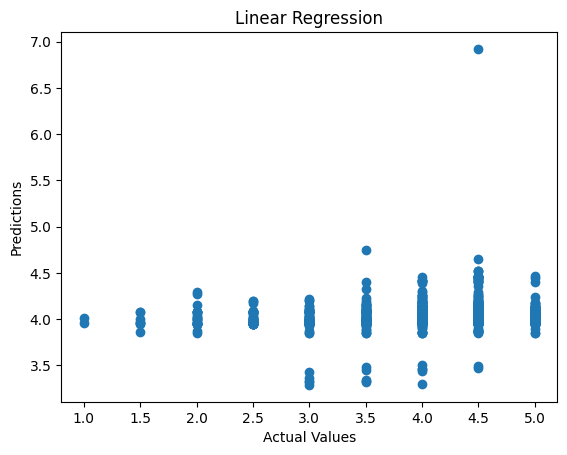

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=6.22083e-20): result may not be accurate.

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=6.78176e-20): result may not be accurate.

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=7.05029e-20): result may not be accurate.

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=6.75777e-20): result may not be accurate.

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=7.75401e-20): result may not be accurate.

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=7.79611e-20): result may not be accurate.



Ridge Regression
Mean squared error: 0.5653857942394774
R-squared: 0.014961064968991966
Cross-validation scores: [0.02963237 0.01672488 0.01507905 0.02755588 0.01263106]
Average cross-validation score: 0.020324650908161025
*******************************************************


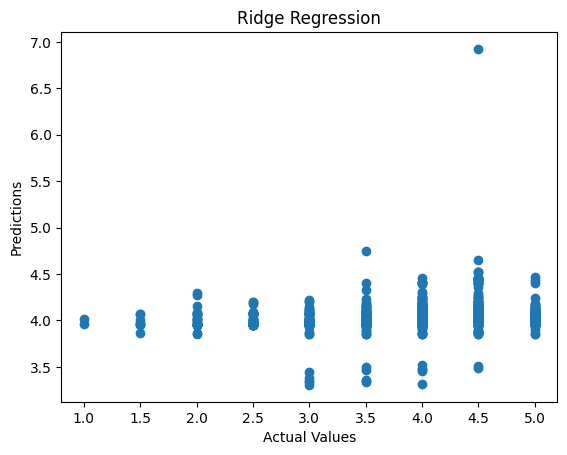

Lasso Regression
Mean squared error: 0.5712487811487981
R-squared: 0.004746322327595309
Cross-validation scores: [0.00185095 0.00188562 0.00310046 0.0039593  0.00202633]
Average cross-validation score: 0.0025645326537696578
*******************************************************


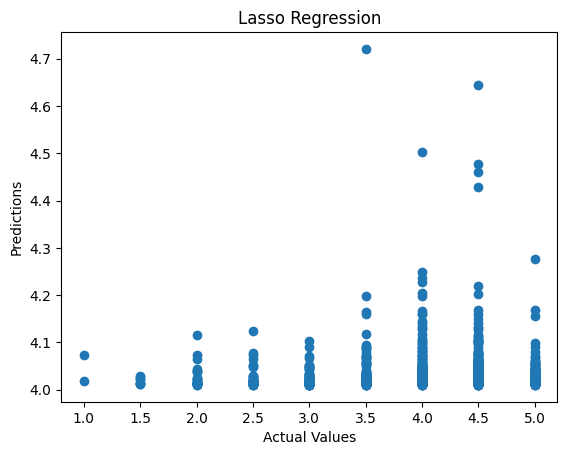

GradientBoosting regression model
*********************************
Mean squared Error: 0.7145872605977442
R-squared:  0.11035028572341932
****************************************************


In [ ]:
# Split the data into training and testing sets

X_new = df_finall[selected_features]
y = df['Average User Rating']



# feature scalling step
from sklearn.preprocessing import StandardScaler
cols_to_scale = ["User Rating Count","In-app Purchases"]
scaler = StandardScaler()
X_new[cols_to_scale] = scaler.fit_transform(X_new[cols_to_scale])








X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
# Regression models
lr = LinearRegression()
ridge = Ridge(alpha=0.5)
lasso = Lasso(alpha=0.5)

models = [lr, ridge, lasso]
names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']


for i in range(len(models)):
    model = models[i]
    name = names[i]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse =  mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    cv_scores = cross_val_score(model, X_new, y, cv=5) # 5-fold cross-validation
    print(name)
    print('Mean squared error:', mse)
    print('R-squared:', r2)
    print('Cross-validation scores:', cv_scores)
    print('Average cross-validation score:', np.mean(cv_scores))
    print('*******************************************************')
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Values')
    plt.ylabel('Predictions')
    plt.title(name)
    plt.show()

#Define the gradient boosting regression model
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)
print('GradientBoosting regression model')
print('*********************************')
y_pred = gb_reg.predict(X_test)
print("Mean squared Error:",np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared: ', gb_reg.score(X_test , y_test ))
y_pred = gb_reg.predict(X_test)
print("****************************************************")
